# Step 1. 사용할 라이브러리 확인

In [2016]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

# 버전 확인. 특히 tensorflow의 경우 버전이 다르면 코드 구동이 제대로 안 될 수도 있다.
print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


# Step 2. 데이터 준비

* 노트북을 활용해 직접 가위, 바위, 보 이미지 100장씩 총 300장을 준비한다. 300장!!! 도대체 언제 준비하나 하겠지만 다행히도 이를 도와줄 수 있는
사이트가 있는데, 바로 구글의 teachable machine 사이트라고 한다.(https://teachablemachine.withgoogle.com/)

* 이 사이트를 통해 웹캠과 연결되면 가위, 바위, 보를 다양한 각도에서 촬영하고 사진을 다운로드 받는다.

* 가위 이미지는 scissor.zip이라는 파일 이름으로, 바위 이미지는 rock.zip이라는 파일 이름으로, 보 이미지는 paper.zip이라는 파일 이름으로 저장한다.
눈치챘겠지만 당근 압축 파일이다. 즉 가위 이미지 100장 압축 파일, 바위 이미지 100장 압축 파일, 보 이미지 100장 압축 파일을 저장한 셈이다.

* 주피터 노트북 안에서는 압축파일 상태로는 이미지를 열람할 수 없어 압축 해제를 해서 풀어야만 한다.
원하는 디렉토리로 이동해서 압축 해제 명령어 unzip rock.zip, unzip scissor.zip, unzip paper.zip을 해서
압축해제를 한다.

In [2017]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이미지 용량이 224 * 224 픽셀로 상당히 큰 파일이어서 읽어들이는 데 어려울 수 있다.
그래서 이미지 크기를 Resize해서 용량을 줄여주는 작업을 한다.

In [2018]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!


In [2019]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
바위 이미지 resize 완료!


In [2020]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
보 이미지 resize 완료!


In [2021]:
import numpy as np

# 가위바위보 이미지 개수 총합에 주의할 것. 가위, 바위, 보 이미지 각각 100장씩이니 총 300장!!!
def load_data(img_path, number_of_data=900):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
#이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


라벨:  0


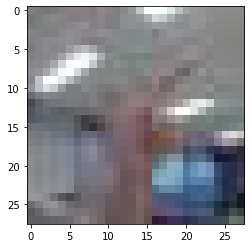

In [2022]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# Step 3. 딥러닝 네트워크 설계

데이터의 준비가 끝났고, 이제 모델을 직접 설계하는 시간이다. 연습 때랑 거의 비슷하지만 input shape에서 주의를 해야 한다. 앞서 연습 때와는 달리 이번에는 컬러 사진을 가지고 왔기 때문에 input shape는 28 * 28 * 1이 아니라 28 * 28 * 3이 되어야 한다. 컬러 사진은 채널이 RGB 3개의 채널로 이루어져 있으니까!!

In [2023]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  8


* Conv2D 레이어의 첫번째 인자 16과 두번째 인자 32의 의미 : 각각 사용하는 이미지 특징의 수로써 처음에는 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 의미.

* Dense 레이어의 첫번째, 두번째 인자 32, 20의 의미 : 분류기에 사용될 뉴런의 숫자. 분류기 알고리즘을 얼마나 복잡하게 할 것인가를 결정

* Dense 레이어의 마지막 인자 3의 의미 : 최종 분류기의 class 수로써 여기에서는 가위, 바위, 보 세 가지의 경우를 판별하기 때문에 3이 된다. 참고로 알파벳을 구분하는 경우라면 A부터 Z까지 대소문자 52개의 클래스 수가 될 것이다.

In [2024]:
model.summary()

Model: "sequential_464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_928 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_928 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_929 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_929 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_464 (Flatten)        (None, 3136)              0         
_________________________________________________________________
dense_1416 (Dense)           (None, 32)                100384    
_________________________________________________________________
dense_1417 (Dense)           (None, 16)             

In [2025]:
# 딥러닝 네트워크를 학습하는 과정이다. 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0880 - accuracy: 0.4033
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9993 - accuracy: 0.5022
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8151 - accuracy: 0.6378
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.7622
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.8444
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8789
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8833
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.9044
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9022
Epoch 10/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9322


# Step 4. 얼마나 잘 만들었는지 확인하기(test)

Cloud Shell에 "mkdir -p ~/aiffel/rock_scissor_paper/test"라는 명령어를 입력하여 test 파일을 불러들인다. 이 역시 앞서 훈련용 데이터를 가공했던 방법과 똑같은 방법으로  resize를 해 줘야 한다. 그러기 위해 test용 가위바위보 사진을 먼저 클라우드 주피터로 먼저 옮겨주자.

In [2026]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")
	print(len(images), " images to be resized.")
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
	print(len(images), " images resized.")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path2)
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path3)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [2027]:
import numpy as np

# 가위바위보 이미지 개수 총합에 주의할 것. 가위, 바위, 보 이미지 각각 100장씩이니 총 300장!!!
def load_data(img_path, number_of_data=300):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
#이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train / 255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [2028]:
x_test_norm = x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [2029]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.5549 - accuracy: 0.4433
test_loss: 2.554870367050171 
test_accuracy: 0.44333332777023315


# Step 5. 모델 개선시키기

In [2030]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [5.3991109e-02 1.3177903e-05 9.4599569e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


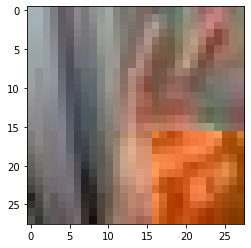

In [2031]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포 :[0.3313929  0.00905207 0.659555  ]
라벨: 0, 예측결과: 2


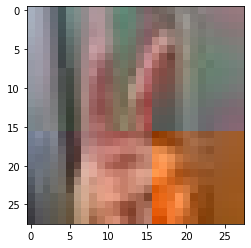

예측확률분포 :[3.2566188e-06 2.6163327e-06 9.9999416e-01]
라벨: 1, 예측결과: 2


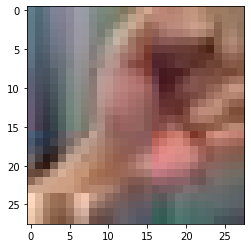

예측확률분포 :[0.01328214 0.98135614 0.00536179]
라벨: 0, 예측결과: 1


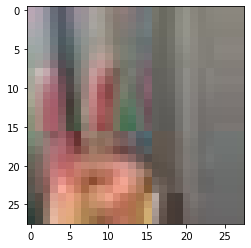

In [2032]:
import random
wrong_predict_list = []
for i,_ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우(틀리게 예측한 경우)만 모으는 과정.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population = wrong_predict_list, k=3)

for n in samples:
    print("예측확률분포 :" + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [2188]:
# 바꿔 볼 수 있는 하이퍼 파라미터
n_channel_1 = 32
n_channel_2 = 64
n_dense_1 = 32
n_dense_2 = 16
# n_dense_3 = 4
n_train_epoch = 40

model = model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', padding = 'same', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense_1, activation='relu'))
model.add(keras.layers.Dense(n_dense_2, activation='relu'))
# model.add(keras.layers.Dense(n_dense_3, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_620"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1240 (Conv2D)         (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_1240 (MaxPooli (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1241 (Conv2D)         (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1241 (MaxPooli (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_620 (Flatten)        (None, 3136)              0         
_________________________________________________________________
dense_1826 (Dense)           (None, 32)                100384    
_________________________________________________________________
dense_1827 (Dense)           (None, 16)             

# 회고

* 우선 가위바위보 사진을 직접 찍어보는 것도 재미있었고, 또 내가 찍은 사진이 가위인지 바위인지 보인지를 판별해내는 모델을 만들어 보았다는 것 역시 굉장히 즐거운 탐험 노드였다고 생각이 된다.

* 그런데 안타깝게도 사진을 잘못 찍었는지, 아니면 최고로 적합한 하이퍼 파라미터 값을 잡아내지 못했는지 이유는 잘 모르겠지만, 최종적인 정확도가 33.33%에서 겉도는 결과값만을 보이며 결과적인 측면으로만 보면 다소 아쉬웠다는 생각이 들었다. 최대 48% 정도의 정확도를 잡아내기는 했다.